In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('../../Data/BaseOrdinal.csv')
ordinal.shape

(2580, 81)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
gb = GradientBoostingRegressor(random_state=1)
cb = CatBoostRegressor(random_state=1, verbose=False)
xgb = XGBRegressor()
lgbm = lgb.LGBMRegressor()
ridge = Ridge()

### With Passthrough

In [6]:
stacking_regressor1 = StackingRegressor(estimators=[('GB', gb),('XGB', xgb),('LGBM', lgbm),('CB', cb)], final_estimator=ridge,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [7]:
stacking_regressor1.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('GB', GradientBoostingRegressor(random_state=1)),
                              ('XGB',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            gamma=None, gpu_id=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            l...
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None,
                                            scale_pos_weight=None,
                                            subsample=None, tree_method=None,
                                            validate_parameters=None,
                                            verbosity=None)),
                              ('LGBM', LGBMRegressor()),
                              ('CB',
                               <catboost.core.CatBoostRegressor object at 0x7fdf28ddaca0>)],
                  final_estimator=Ridge(), passthrough=True)

In [8]:
stacking_regressor1.score(X,y)

0.9889977347654375

### Without Passthrough

In [9]:
stacking_regressor2 = StackingRegressor(estimators=[('GB', gb),('XGB', xgb),('LGBM', lgbm),('CB', cb)], final_estimator=ridge,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=False)

In [10]:
stacking_regressor2.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('GB', GradientBoostingRegressor(random_state=1)),
                              ('XGB',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            gamma=None, gpu_id=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            l...
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None,
                                            scale_pos_weight=None,
                                            subsample=None, tree_method=None,
                                            validate_parameters=None,
                                            verbosity=None)),
                              ('LGBM', LGBMRegressor()),
                              ('CB',
                               <catboost.core.CatBoostRegressor object at 0x7fdf28ddaca0>)],
                  final_estimator=Ridge())

In [11]:
stacking_regressor2.score(X,y)

0.993850132412936

In [12]:
stacking_regressor4 = StackingRegressor(estimators=[('GB', gb),('XGB', xgb),('LGBM', lgbm),('CB', cb)], final_estimator=ridge,
                                       cv=5,
                                       passthrough=False)

In [13]:
stacking_regressor4.fit(X,y)

StackingRegressor(cv=5,
                  estimators=[('GB', GradientBoostingRegressor(random_state=1)),
                              ('XGB',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            gamma=None, gpu_id=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=Non...
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None,
                                            scale_pos_weight=None,
                                            subsample=None, tree_method=None,
                                            validate_parameters=None,
                                            verbosity=None)),
                              ('LGBM', LGBMRegressor()),
                              ('CB',
                               <catboost.core.CatBoostRegressor object at 0x7fdf28ddaca0>)],
                  final_estimator=Ridge())

In [14]:
stacking_regressor4.score(X,y)

0.9928723017618292

In [15]:
scores4 = cross_validate(stacking_regressor4, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [16]:
scores4

{'fit_time': array([15.27579999, 15.35034895, 15.34002709, 15.29025793, 15.30988097]),
 'score_time': array([0.00940394, 0.01025987, 0.00942492, 0.01207829, 0.0093751 ]),
 'estimator': [StackingRegressor(cv=5,
                    estimators=[('GB', GradientBoostingRegressor(random_state=1)),
                                ('XGB',
                                 XGBRegressor(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              enable_categorical=False,
                                              gamma=None, gpu_id=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None,
                             

In [17]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [18]:
cat = evaluate_model(cb, X, y)

In [19]:
cat

,fit_time,score_time,test_score
0,8.477433,0.019339,0.920566
1,5.455021,0.007295,0.899820
2,5.440616,0.009601,0.938045
3,5.271587,0.004452,0.933383
4,5.436062,0.007016,0.949361
5,10.231240,0.025642,0.934502
6,10.304860,0.016593,0.944618
7,5.378720,0.009575,0.924652
8,5.108243,0.006218,0.947610
9,5.129201,0.004841,0.883656


In [20]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [21]:
cat

,cat_score
0,0.920566
1,0.899820
2,0.938045
3,0.933383
4,0.949361
5,0.934502
6,0.944618
7,0.924652
8,0.947610
9,0.883656


In [22]:
df4 = evaluate_model(stacking_regressor4, X, y)

In [23]:
df4

,fit_time,score_time,test_score
0,111.291602,0.039867,0.909030
1,121.042238,0.027581,0.885046
2,100.373500,0.034306,0.935385
3,101.160246,0.023125,0.934027
4,110.140236,0.019049,0.948669
5,115.149811,0.037243,0.933222
6,102.412189,0.043200,0.942482
7,102.942306,0.024440,0.928464
8,107.278694,0.012402,0.945889
9,106.614999,0.012367,0.877430


In [24]:
df4 = df4[['test_score']].rename(columns={'test_score':'test_score_4'})

In [25]:
df4

,test_score_4
0,0.909030
1,0.885046
2,0.935385
3,0.934027
4,0.948669
5,0.933222
6,0.942482
7,0.928464
8,0.945889
9,0.877430


In [26]:
combo = pd.concat([cat, df4], axis=1)

In [27]:
combo

,cat_score,test_score_4
0,0.920566,0.909030
1,0.899820,0.885046
2,0.938045,0.935385
3,0.933383,0.934027
4,0.949361,0.948669
5,0.934502,0.933222
6,0.944618,0.942482
7,0.924652,0.928464
8,0.947610,0.945889
9,0.883656,0.877430


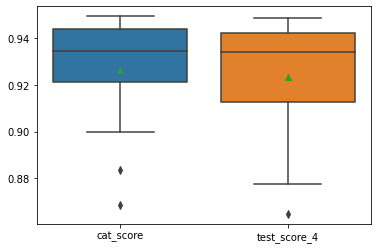

In [28]:
sns.boxplot(data=combo, showmeans=True);

In [29]:
combo.describe()

,cat_score,test_score_4
count,15.000000,15.000000
mean,0.926385,0.923302
std,0.024378,0.027174
min,0.868666,0.864734
25%,0.921228,0.912622
50%,0.934502,0.934027
75%,0.943737,0.942388
max,0.949361,0.948669
